# Calculating signal-to-noise ratios

Looking through hundreds of folded pulse profiles by eye would be very slow and difficult.

Earlier, we learned about the **signal-to-noise ratio (SNR)** and how adding data together can make a weak signal easier to see.

You have now used this idea in practice by **folding the time series** and stacking many pulses together.  
This allowed you to reveal a pulsar signal that was completely hidden in the noise before.

After folding, we are left with a **pulse profile** for each trial period.  
Some of these profiles contain only noise, while others contain a real pulsar signal.

To decide which profile contains the pulsar, we need a way to **measure how strong the signal is compared to the noise**.

That is exactly what the **signal-to-noise ratio (SNR)** tells us.

By calculating the SNR automatically, we can quickly find the pulsar **without needing to inspect every profile by eye**.


----

In a folded pulse profile, not all parts of the profile contain the pulsar signal.

The small region where the pulse appears is called the **on-pulse** region.  
This is where the pulsar beam points toward Earth and we see a peak in the signal.

The rest of the profile is called the **off-pulse** region.  
In this region, the pulsar beam is not pointing toward Earth, so the data contains only noise.

We use the off-pulse region to measure the background noise level, and the on-pulse region to measure the strength of the pulsar signal.  
Comparing these two is how we calculate the signal-to-noise ratio (SNR).

## Signal-to-noise ratio (SNR)

For this tutorial, we define the signal-to-noise ratio (SNR) of a folded profile as:

### $ \mathrm{SNR} = \frac{S_{\text{peak}} - \mu_{\text{off}}}{\sigma_{\text{off}}} $

where:
- $ S_{\text{peak}} $ is the **maximum height of the pulse** (the highest point in the profile)
- $ \mu_{\text{off}} $ is the **mean of the off-pulse region**, which measures the average photon count
- $ \sigma_{\text{off}} $ is the **standard deviation of the off-pulse region**, which measures the noise level

This definition works well because a real pulsar produces a clear peak, while the off-pulse region contains only noise.

A higher SNR means the pulse stands out more. Let's calculate the SNR for the pulsar we found in the last section.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
pulsar_profile = np.load('data_2/pulsar_profile.npy')
pulsar_phase = np.linspace(0, 1, len(pulsar_profile))

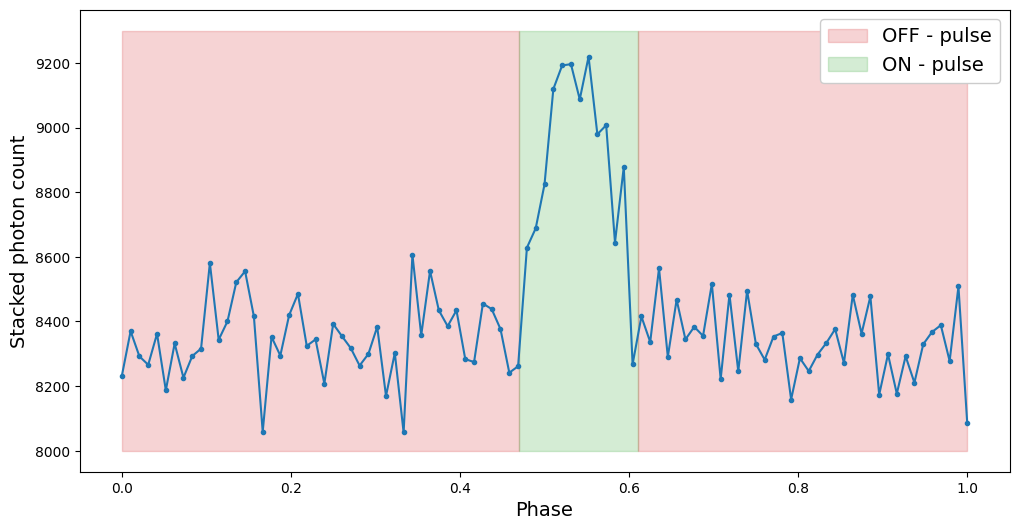

In [52]:
# let's show the on and off pulse regions
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(pulsar_phase, pulsar_profile, 'C0.-')
ax.set_xlabel('Phase', fontsize=14)
ax.set_ylabel('Stacked photon count', fontsize=14)

ax.fill_between(x=[0, 0.47], y1=8000, y2=9300, color='C3', alpha=0.2, label='OFF - pulse')
ax.fill_between(x=[0.47, 0.61], y1=8000, y2=9300, color='C2', alpha=0.2, label='ON - pulse')
ax.fill_between(x=[0.61, 1], y1=8000, y2=9300, color='C3', alpha=0.2)

ax.legend(fontsize=14, loc=1, framealpha=1)

Okay now let's calculate the SNR of this pulsar. 

In [54]:
def calculate_SNR(phase, profile, on_pulse_left, on_pulse_right):
    # max_peak = ?
    # mean = ?
    # standard_deviation = ?

    # SNR = ?
    # return SNR
    pass

In [55]:
on_pulse_left = 0.47
on_pulse_right = 0.61

calculate_SNR(pulsar_phase, pulsar_profile, on_pulse_left, on_pulse_right)

np.float64(7.702937691771771)

But how can we figure out the width of the pulse without manually looking at the folded profile? 

Most pulsars have a pulse width that is 10 % of the period, so let's update the code to use that.

In [56]:
def calculate_SNR(phase, profile):
    pulse_width = 0.1
    period = len(profile)

    # max_peak_location = ?
    # max_peak_phase = ?
    # on_pulse_left = ?
    # on_pulse_right = ?

    # max_peak = ?
    # mean = ?
    # standard_deviation = ?

    # SNR = ?
    # return SNR

In [57]:
calculate_SNR(pulsar_phase, pulsar_profile)

np.float64(7.140796745589969)

Now let's calculate the SNR for the noise folded profile

In [4]:
noise_profile = np.load('data_2/noise_profile.npy')
noise_phase = np.linspace(0, 1, len(noise_profile))

Text(0, 0.5, 'Stacked photon count')

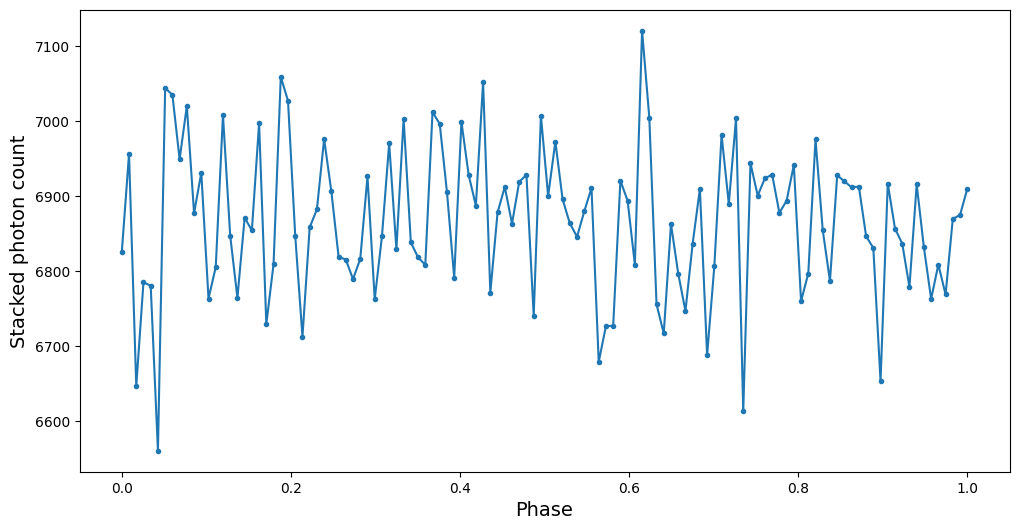

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(noise_phase, noise_profile, 'C0.-')
ax.set_xlabel('Phase', fontsize=14)
ax.set_ylabel('Stacked photon count', fontsize=14)

In [61]:
calculate_SNR(noise_phase, noise_profile)

np.float64(2.5994191437126544)

You can see that the SNR for the folded profile with no pulsar is much smaller that that with a pulsar.

## Challenge:
Go back to the previous notebook and calulate the SNR for every folded profile and then plot period vs SNR